In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [131]:
df = pd.read_csv('weekly.csv')

print(df.head())

   Unnamed: 0  Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  \
0           1  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270   
1           2  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576   
2           3  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514   
3           4  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712   
4           5  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178   

  Direction  
0      Down  
1      Down  
2        Up  
3        Up  
4        Up  


In [132]:
df.drop('Unnamed: 0', axis=1, inplace=True)

df['Direction'] = df['Direction'].map({"Up" : 1, "Down" : 0})

print(df.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270          0
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576          0
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514          1
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712          1
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178          1


In [133]:
# (13.a)

df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.555556
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.000000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000


<Axes: >

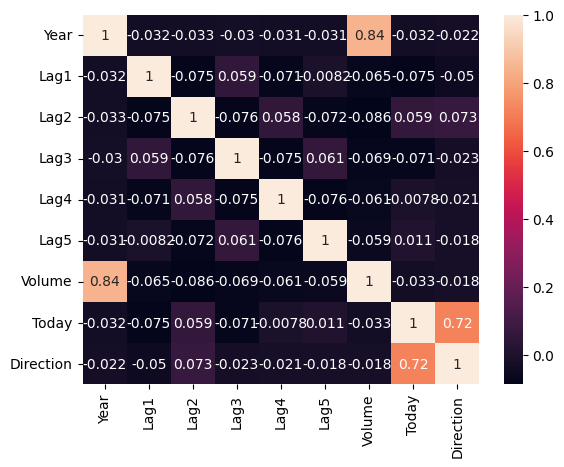

In [134]:
sns.heatmap(df.corr(), annot = True)

<Axes: >

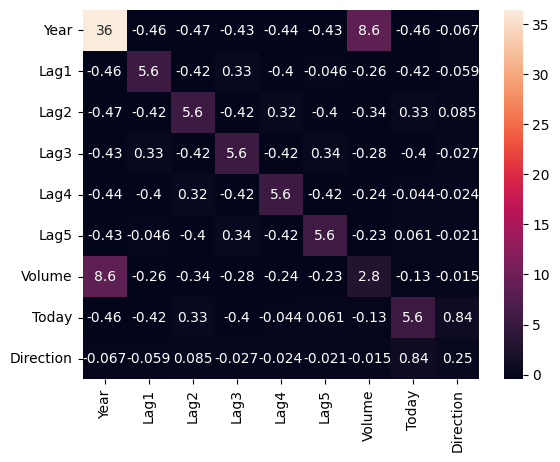

In [135]:
sns.heatmap(df.cov(), annot = True)

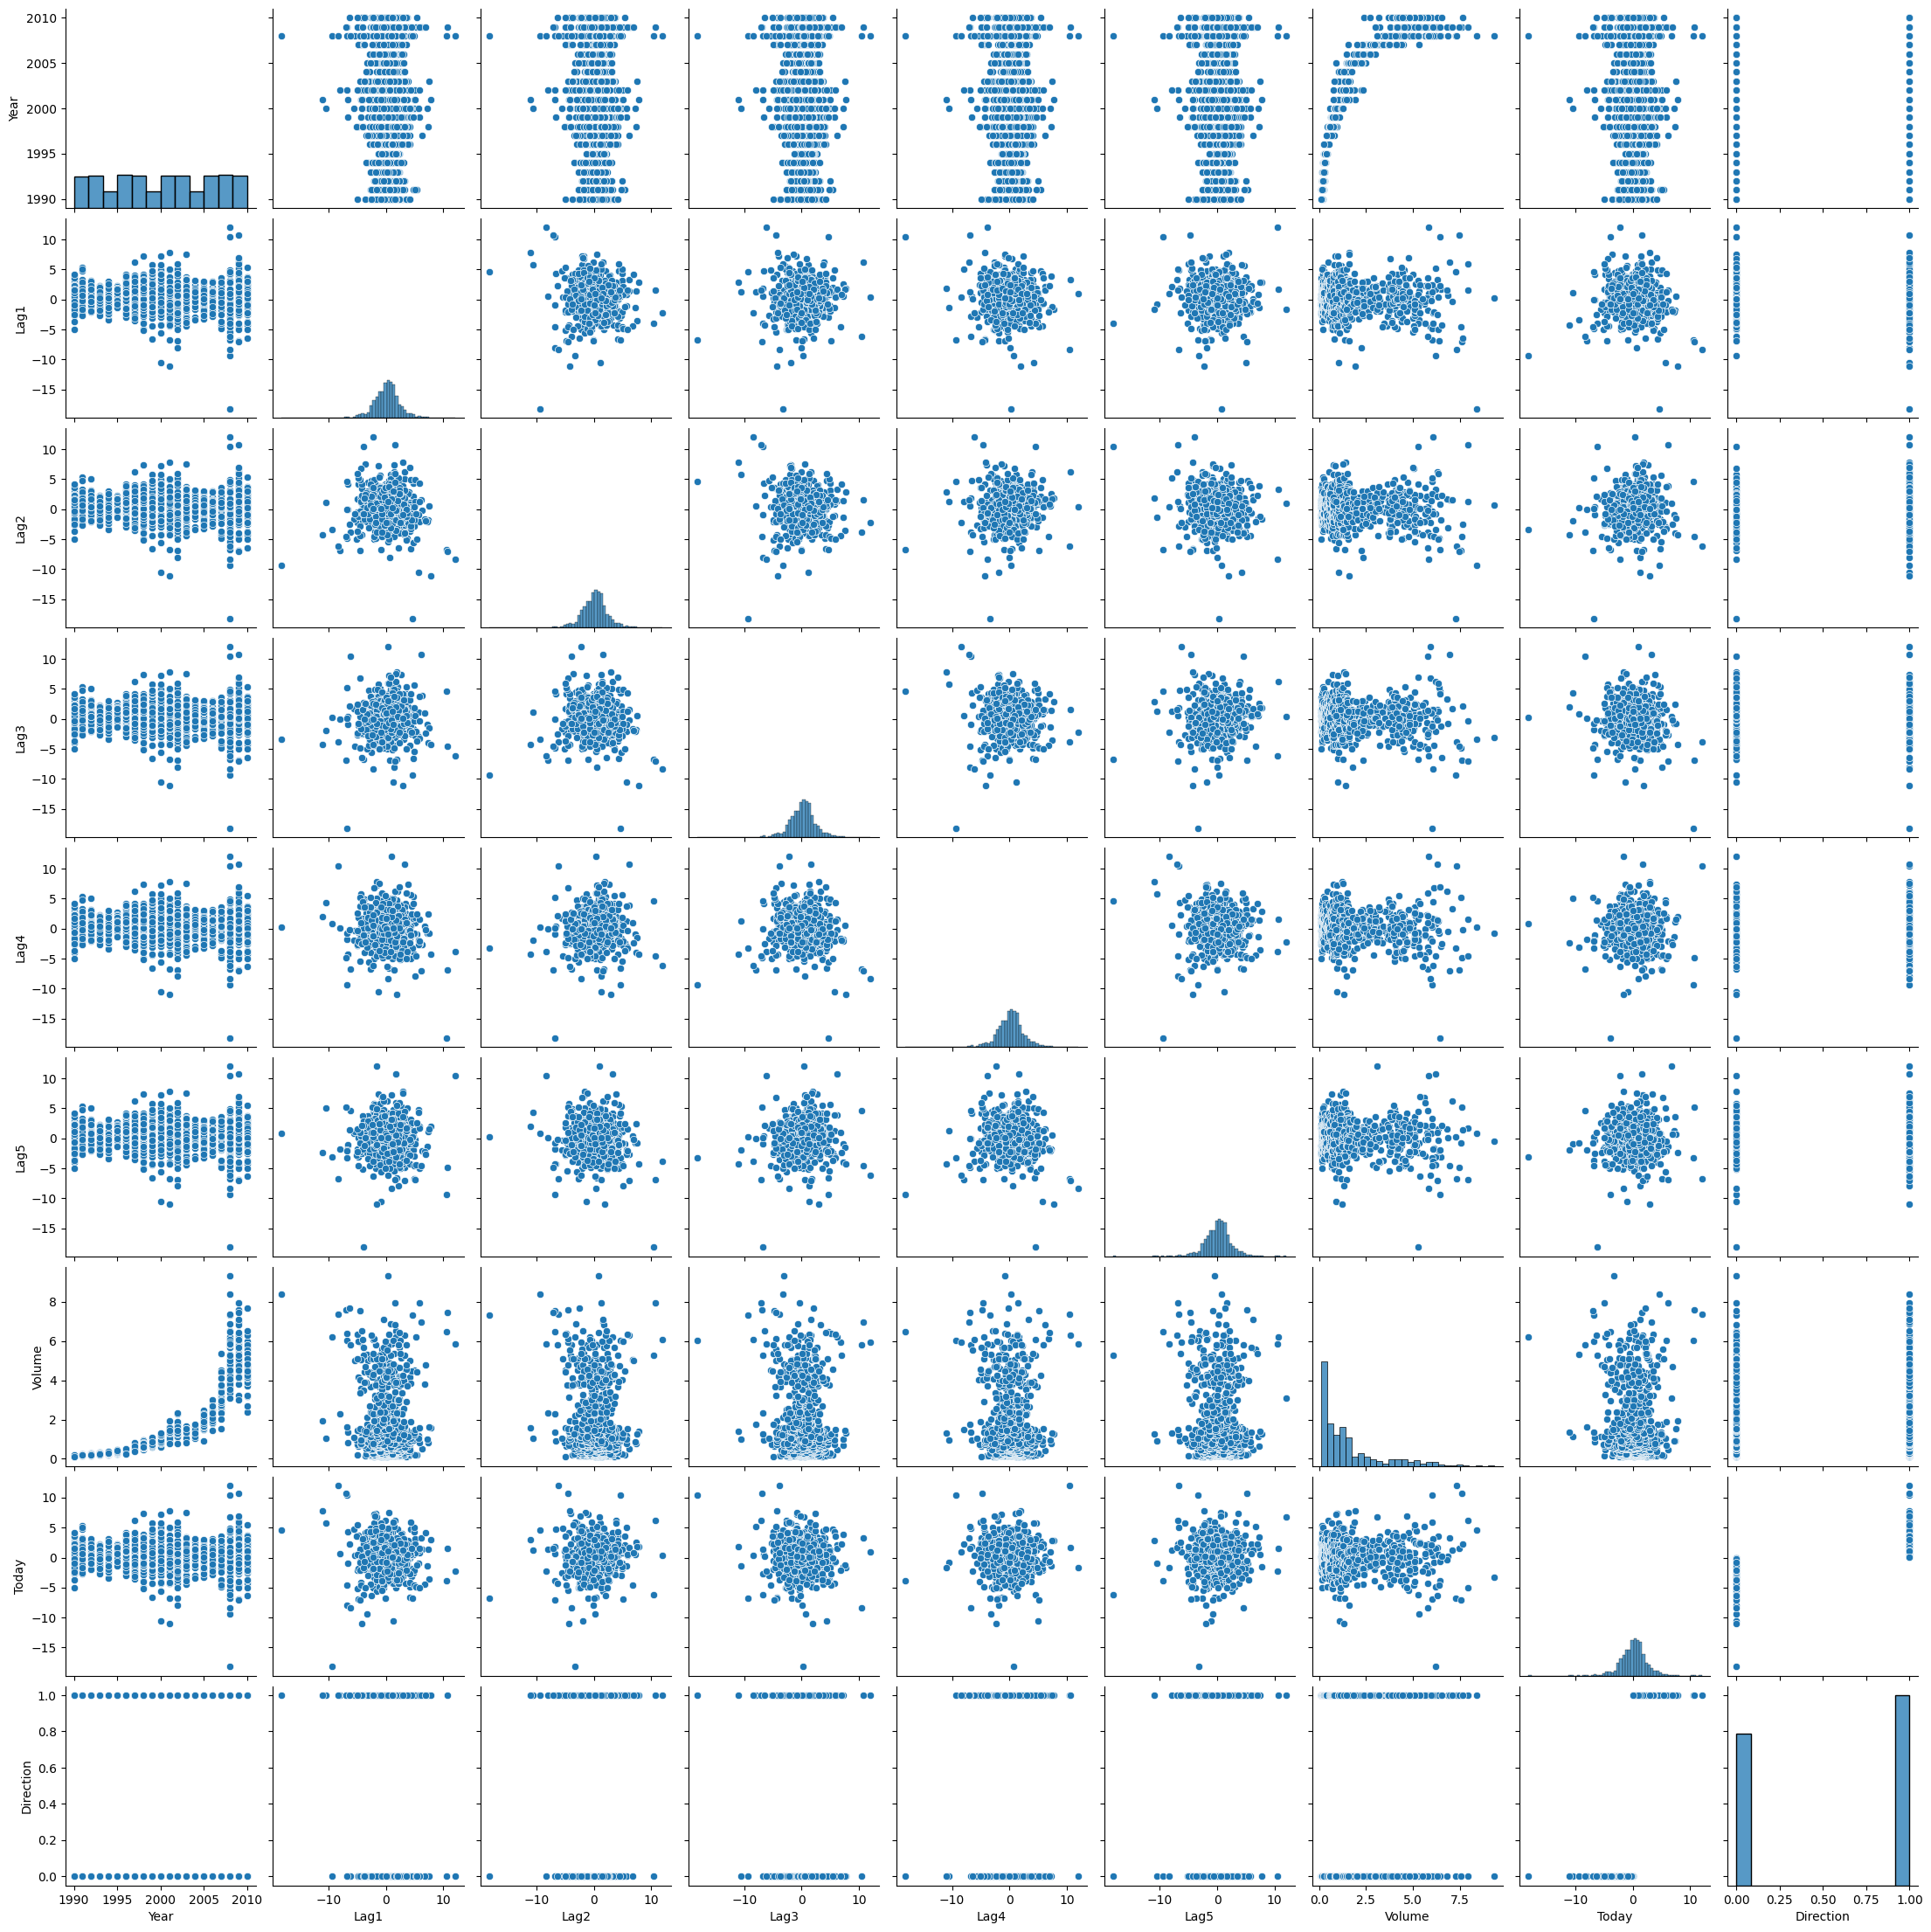

In [136]:
sns.pairplot(df)

In [137]:
# (13.b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors


f = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'

model = smf.logit(formula=f, data=df).fit()

model.summary()


Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 27 Jul 2025   Pseudo R-squ.:                0.006580
Time:                        18:05:06   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [138]:
# (13.c) Compute the confusion matrix and overall fraction of correct predictions.

prediction = (model.predict(df) > 0.5)

# metrics.confusion_matrix(y_true, y_pred)

confusion_matrix = metrics.confusion_matrix(df['Direction'], prediction)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: Down', 'Predicted: Up'], index=['Actual: Down', 'Actual: Up'])

print(confusion_matrix_df)

              Predicted: Down  Predicted: Up
Actual: Down               54            430
Actual: Up                 48            557


In [139]:
def print_conf_matrix_stats(conf_mtrx):
    
    if len(conf_mtrx) != 2 or len(conf_mtrx[0]) != 2:
        print("only 2x2 confusion matrices are supported.")
        return

    TN, FP = conf_mtrx[0]
    FN, TP = conf_mtrx[1]

    total = TN + FP + FN + TP
    accuracy = (TP + TN) / total 
    precision = TP / (TP + FP) 
    recall = TP / (TP + FN) 
    f1_score = 2 * precision * recall / (precision + recall) 
    
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1_score:.4f}")


In [140]:
print_conf_matrix_stats(confusion_matrix)

Accuracy : 0.5611
Precision: 0.5643
Recall   : 0.9207
F1 Score : 0.6997


In [141]:
# (13.d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor.

# Compute the confusion matrix and the overall fraction of correct predictions for the data from 2009 and 2010

train_df = df[(df['Year'] >= 1990) & (df['Year'] <= 2008)]

test_df = df[df['Year'] >= 2009]

f = 'Direction ~ Lag2'

model = smf.logit(formula=f, data=train_df).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sun, 27 Jul 2025   Pseudo R-squ.:                0.003076
Time:                        18:05:15   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [142]:
prediction = (model.predict(test_df) > 0.5)

confusion_matrix = metrics.confusion_matrix(test_df['Direction'], prediction)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: Down', 'Predicted: Up'], index=['Actual: Down', 'Actual: Up'])

print(confusion_matrix_df)

print() 

print_conf_matrix_stats(confusion_matrix)

              Predicted: Down  Predicted: Up
Actual: Down                9             34
Actual: Up                  5             56

Accuracy : 0.6250
Precision: 0.6222
Recall   : 0.9180
F1 Score : 0.7417


In [143]:
# (13.e) use LDA 

X_train = pd.DataFrame(train_df['Lag2'])
y_train = train_df['Direction']

X_test = pd.DataFrame(test_df['Lag2'])
y_test = test_df['Direction']

# fit model
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)

# predict
y_pred_lda = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lda)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: Down', 'Predicted: Up'], index=['Actual: Down', 'Actual: Up'])

print(confusion_matrix_df)

print()

print_conf_matrix_stats(confusion_matrix)

              Predicted: Down  Predicted: Up
Actual: Down                9             34
Actual: Up                  5             56

Accuracy : 0.6250
Precision: 0.6222
Recall   : 0.9180
F1 Score : 0.7417


In [144]:
# (13.f) use QDA

# Fit model
qda = QuadraticDiscriminantAnalysis()
model = qda.fit(X_train, y_train)

# predict
y_pred_qda = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_qda)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: Down', 'Predicted: Up'], index=['Actual: Down', 'Actual: Up'])

print(confusion_matrix_df)

print() 

print_conf_matrix_stats(confusion_matrix)

              Predicted: Down  Predicted: Up
Actual: Down                0             43
Actual: Up                  0             61

Accuracy : 0.5865
Precision: 0.5865
Recall   : 1.0000
F1 Score : 0.7394


In [145]:
# (13.g) use KNN with K = 1

knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X_train, y_train)

y_pred_knn = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: Down', 'Predicted: Up'], index=['Actual: Down', 'Actual: Up'])

print(confusion_matrix_df)

print() 

print_conf_matrix_stats(confusion_matrix)

              Predicted: Down  Predicted: Up
Actual: Down               21             22
Actual: Up                 30             31

Accuracy : 0.5000
Precision: 0.5849
Recall   : 0.5082
F1 Score : 0.5439


In [146]:
# (13.h) use naive Bayes

#Fit Naive Bayes model
nb = GaussianNB()
model = nb.fit(X_train, y_train)

y_pred_nb = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_nb)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: Down', 'Predicted: Up'], index=['Actual: Down', 'Actual: Up'])

print(confusion_matrix_df)

print() 

print_conf_matrix_stats(confusion_matrix)

              Predicted: Down  Predicted: Up
Actual: Down                0             43
Actual: Up                  0             61

Accuracy : 0.5865
Precision: 0.5865
Recall   : 1.0000
F1 Score : 0.7394


In [147]:
# (14.a) 

df = pd.read_csv('Auto.csv')

print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [148]:
median_mpg = df['mpg'].median()

print("median mpg = ", median_mpg)

df['mpg01'] = (df['mpg'] > median_mpg).astype(int)

df['horsepower'] = df['horsepower'].replace('?', np.nan) # replace '?' with NaN (missing value)

df['horsepower'] = df['horsepower'].astype(np.float64)

df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

print(df.head())

median mpg =  23.0
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  mpg01  
0       1  chevrolet chevelle malibu      0  
1       1          buick skylark 320      0  
2       1         plymouth satellite      0  
3       1              amc rebel sst      0  
4       1                ford torino      0  


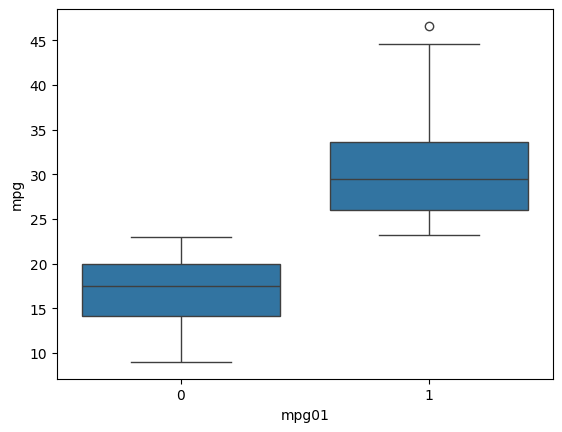

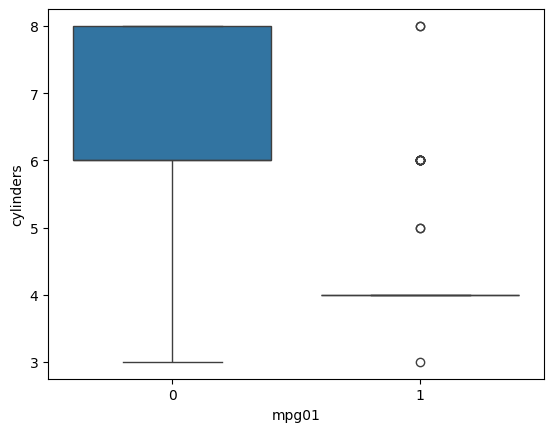

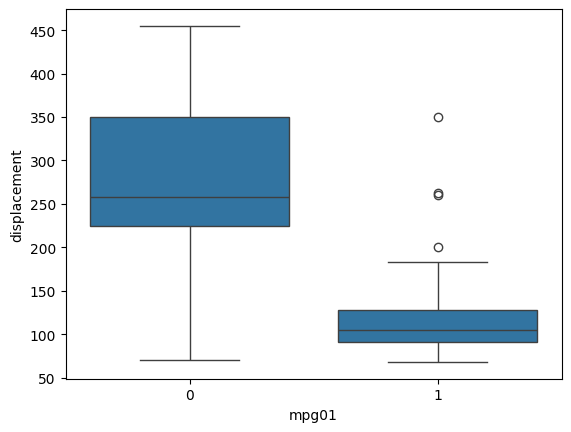

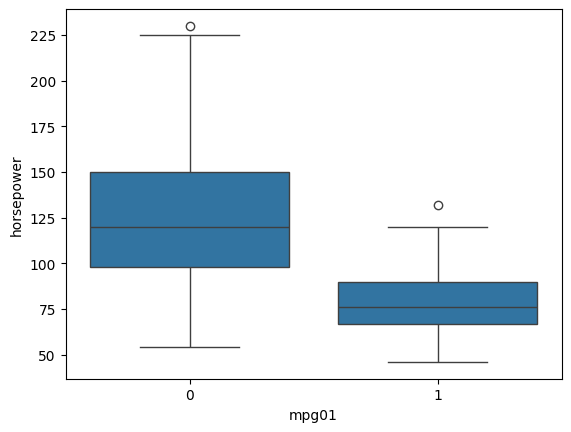

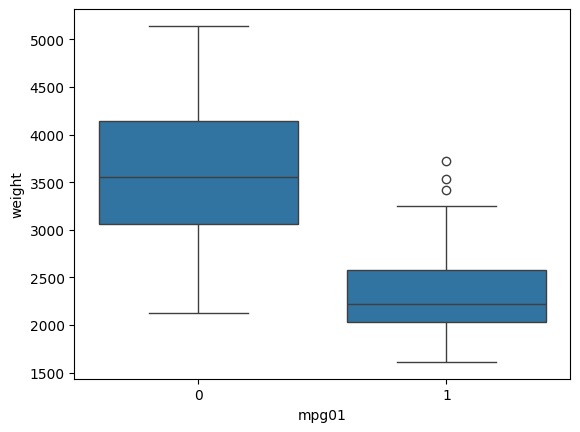

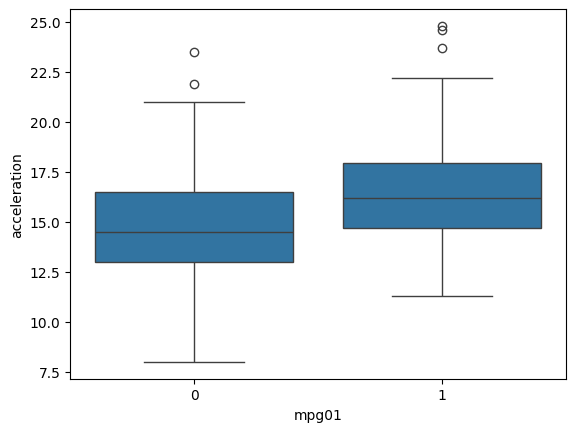

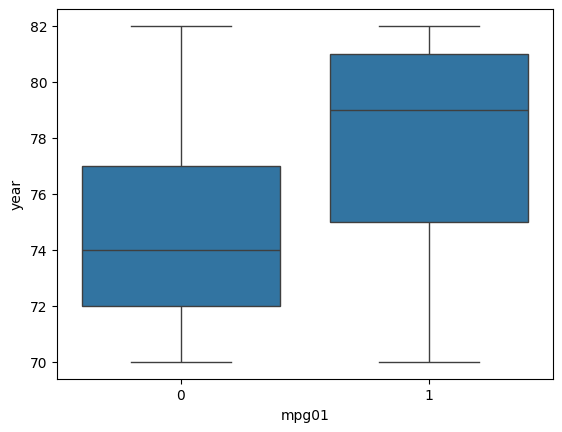

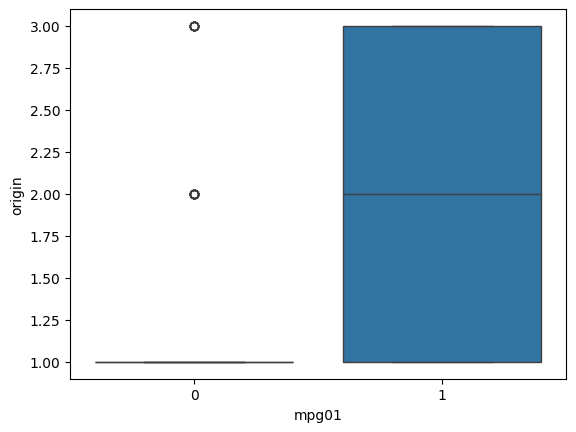

In [149]:
# (14.b)

auto_df = df.drop(['mpg01', 'name'], axis=1)

for c in auto_df.columns:
    sns.boxplot(x=df['mpg01'], y=auto_df[c])
    plt.show()

In [150]:
# The stronger the separation between the boxes, the more useful the feature is likely to be for predicting mpg01

# dispacement, horsepower and weight features seem most likely to be useful in predicting mpg01.

In [151]:
# (14.c) 

df = df.drop(['mpg','cylinders', 'acceleration', 'year', 'origin', 'name'], axis = 1)

df['weight'] = df['weight'].astype(np.float64)

print(df.head())

   displacement  horsepower  weight  mpg01
0         307.0       130.0  3504.0      0
1         350.0       165.0  3693.0      0
2         318.0       150.0  3436.0      0
3         304.0       150.0  3433.0      0
4         302.0       140.0  3449.0      0


In [152]:
# (14.d) Split the data into a training set and a test set

train, test = train_test_split(df, test_size=0.3)

X_train = train[['displacement', 'horsepower', 'weight']]
y_train = train['mpg01']

X_test = test[['displacement', 'horsepower', 'weight']]
y_test = test['mpg01']

In [153]:
# (14.e) Perform LDA

# fit model
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)

# predict
y_pred_lda = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lda)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])

print(confusion_matrix_df)

print()

print_conf_matrix_stats(confusion_matrix)

           Predicted: 0  Predicted: 1
Actual: 0            47            16
Actual: 1             6            51

Accuracy : 0.8167
Precision: 0.7612
Recall   : 0.8947
F1 Score : 0.8226


In [154]:
# (14.f) Perform QDA

# fit model
qda = QuadraticDiscriminantAnalysis()
model = qda.fit(X_train, y_train)

# predict
y_pred_qda = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_qda)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])

print(confusion_matrix_df)

print()

print_conf_matrix_stats(confusion_matrix)

           Predicted: 0  Predicted: 1
Actual: 0            51            12
Actual: 1             7            50

Accuracy : 0.8417
Precision: 0.8065
Recall   : 0.8772
F1 Score : 0.8403


In [155]:
# (14.f) Perform logistic regression

# fit model
model = LogisticRegression().fit(X_train, y_train)

# predict
y_pred_lr = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])

print(confusion_matrix_df)

print()

print_conf_matrix_stats(confusion_matrix)

           Predicted: 0  Predicted: 1
Actual: 0            50            13
Actual: 1             8            49

Accuracy : 0.8250
Precision: 0.7903
Recall   : 0.8596
F1 Score : 0.8235


In [156]:
# (14.g) Perform naive Bayes

#Fit Naive Bayes model
nb = GaussianNB()
model = nb.fit(X_train, y_train)

y_pred_nb = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_nb)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: Down', 'Predicted: Up'], index=['Actual: Down', 'Actual: Up'])

print(confusion_matrix_df)

print() 

print_conf_matrix_stats(confusion_matrix)

              Predicted: Down  Predicted: Up
Actual: Down               49             14
Actual: Up                  3             54

Accuracy : 0.8583
Precision: 0.7941
Recall   : 0.9474
F1 Score : 0.8640


In [157]:
# (14.h) Perform KNN 

# K = 1

knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X_train, y_train)

y_pred_knn = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: Down', 'Predicted: Up'], index=['Actual: Down', 'Actual: Up'])

print(confusion_matrix_df)

print() 

print_conf_matrix_stats(confusion_matrix)

              Predicted: Down  Predicted: Up
Actual: Down               53             10
Actual: Up                 10             47

Accuracy : 0.8333
Precision: 0.8246
Recall   : 0.8246
F1 Score : 0.8246


In [158]:
# K = 5

knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(X_train, y_train)

y_pred_knn = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: Down', 'Predicted: Up'], index=['Actual: Down', 'Actual: Up'])

print(confusion_matrix_df)

print() 

print_conf_matrix_stats(confusion_matrix)

              Predicted: Down  Predicted: Up
Actual: Down               50             13
Actual: Up                  8             49

Accuracy : 0.8250
Precision: 0.7903
Recall   : 0.8596
F1 Score : 0.8235


In [159]:
# K = 10

knn = KNeighborsClassifier(n_neighbors=10)
model = knn.fit(X_train, y_train)

y_pred_knn = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: Down', 'Predicted: Up'], index=['Actual: Down', 'Actual: Up'])

print(confusion_matrix_df)

print() 

print_conf_matrix_stats(confusion_matrix)

              Predicted: Down  Predicted: Up
Actual: Down               51             12
Actual: Up                  9             48

Accuracy : 0.8250
Precision: 0.8000
Recall   : 0.8421
F1 Score : 0.8205


In [160]:
# (15.a) 

def Power():
     print(np.power(2, 3))

Power()

8


In [161]:
# (15.b)

def Power2(x, a):
    return np.power(x, a)

print(Power2(3, 8))

6561


In [162]:
# (15.c)

print(Power2(10, 3))

print(Power2(8, 17))

print(Power2(131, 3))

1000
2251799813685248
2248091


In [163]:
# (15.d)

def Power3(x, a):
    result = x ** a
    return result

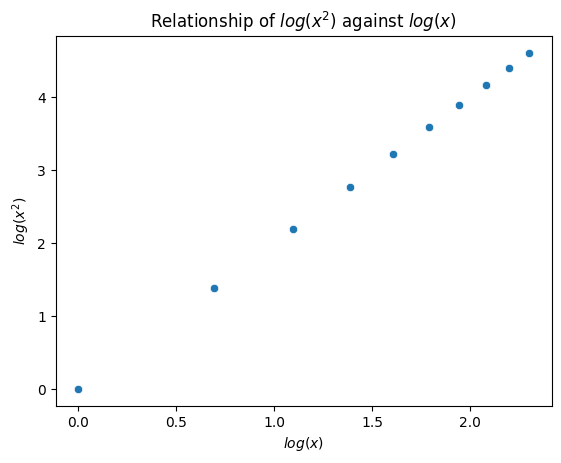

In [164]:
# (15.e)

x = np.arange(1, 11)

y = Power3(x, 2)

ax = sns.scatterplot(x=np.log(x), y=np.log(y))
plt.xlabel('$log(x)$')
plt.ylabel('$log(x^2)$')
plt.title('Relationship of $log(x^2)$ against $log(x)$')
plt.show();

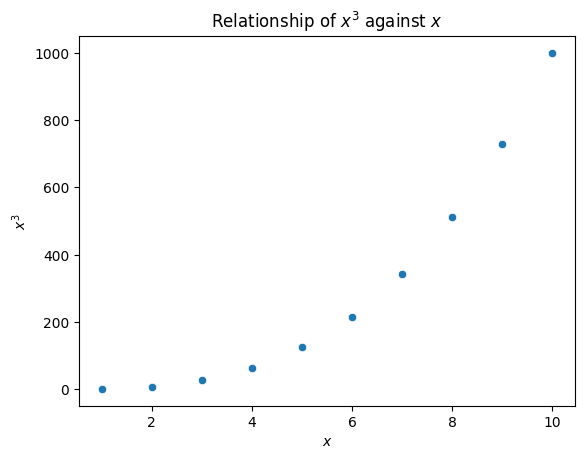

In [165]:
# (15.f)

def PlotPower(n):
    x = np.arange(1, n+1)
    y = np.power(x, 3)
    ax = sns.scatterplot(x = x, y = y)
    plt.xlabel('$x$')
    plt.ylabel('$x^3$')
    plt.title('Relationship of $x^3$ against $x$')
    plt.show()

PlotPower(10)    

In [166]:
# (16.a)

df = pd.read_csv('BostonHousing.csv')

crime_rate_median = df['CRIM'].median()

print("crime rate median = ", crime_rate_median)

df['crime_rate'] = (df['CRIM'] > crime_rate_median).map({True : 1, False : 0})

print(df.head())

crime rate median =  0.25651
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  CAT. MEDV  crime_rate  
0   4.98  24.0          0           0  
1   9.14  21.6          0           0  
2   4.03  34.7          1           0  
3   2.94  33.4          1           0  
4   5.33  36.2          1           0  


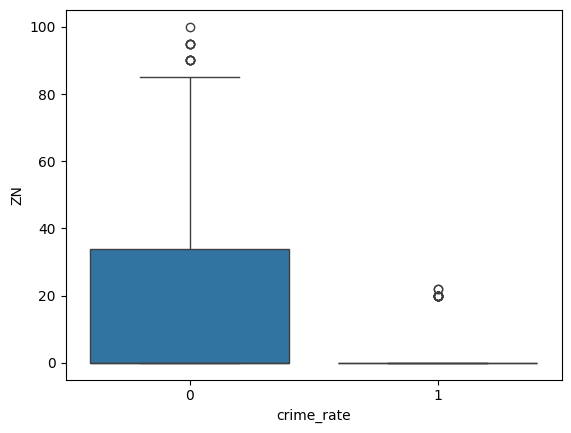

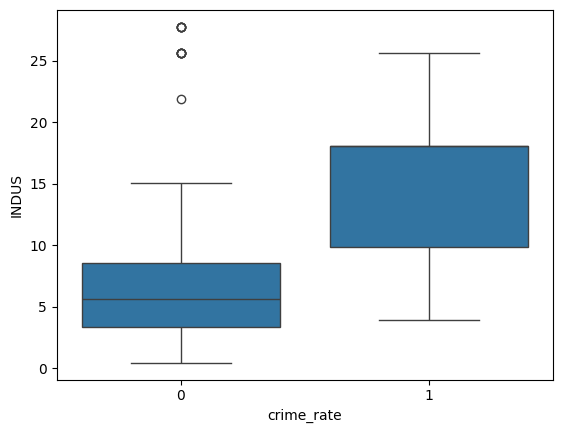

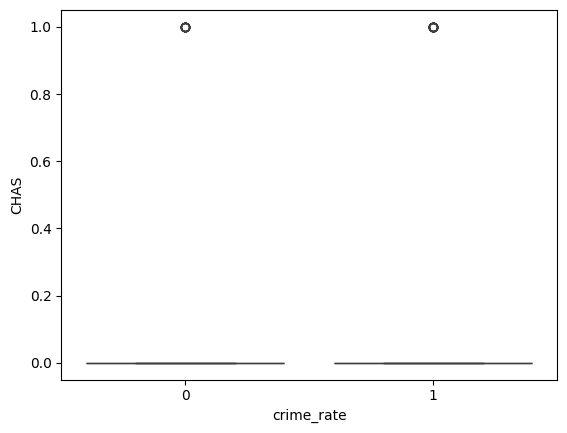

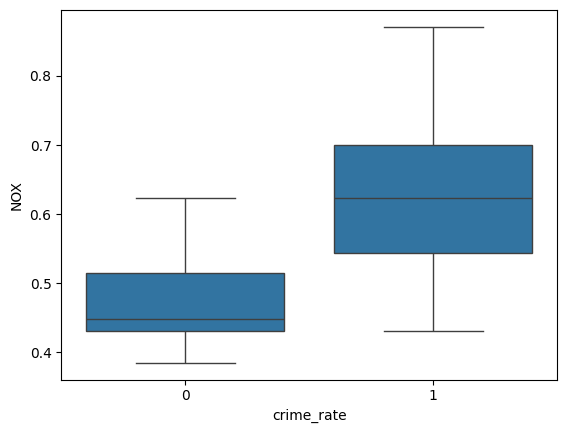

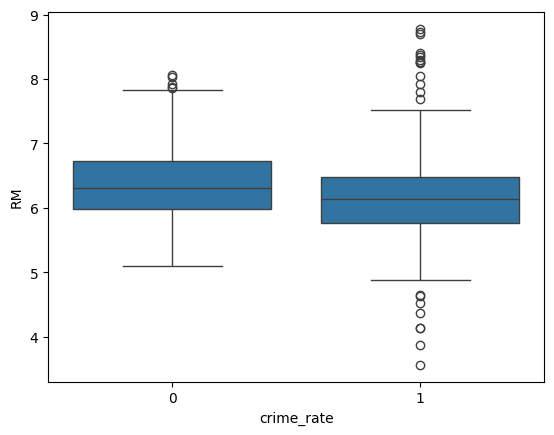

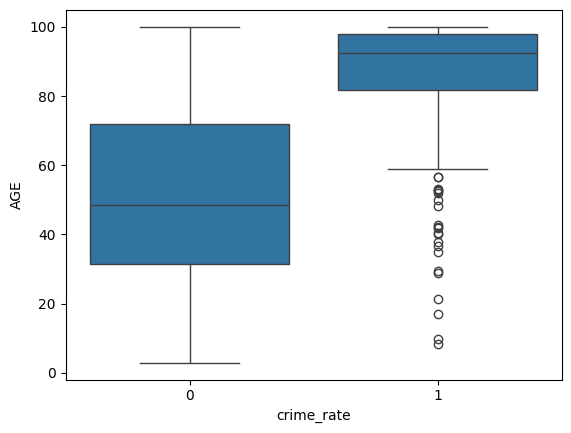

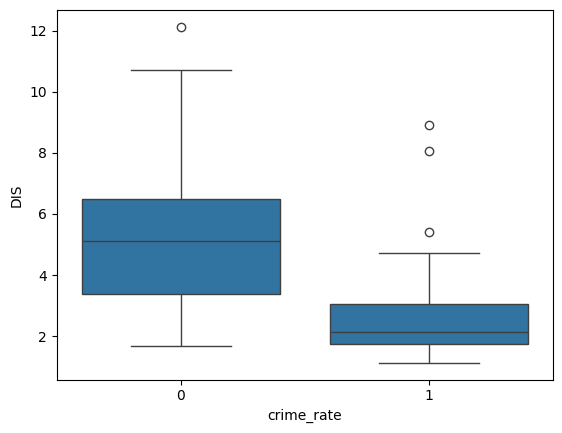

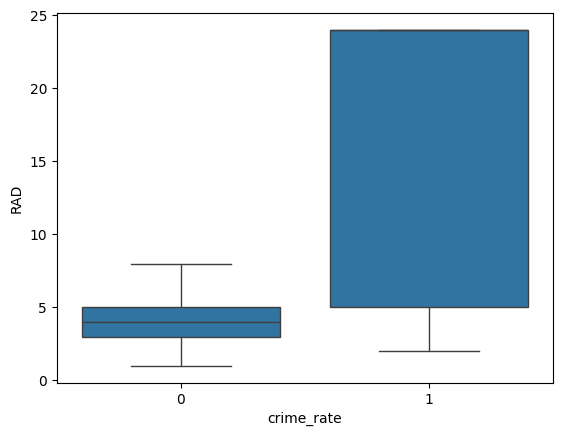

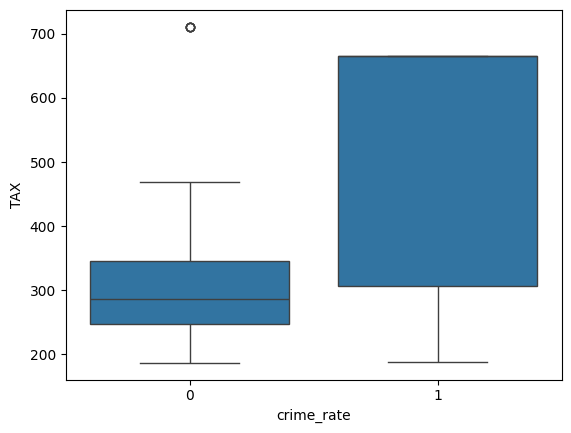

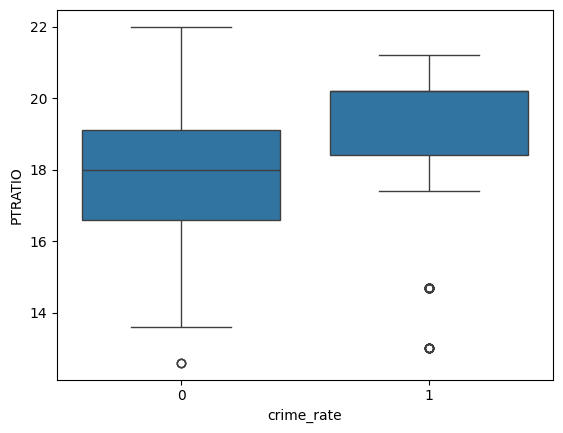

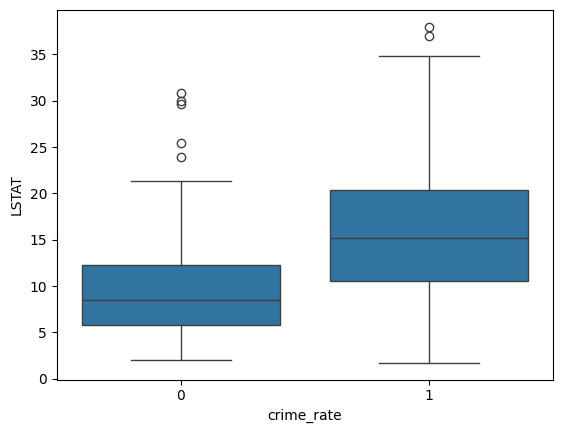

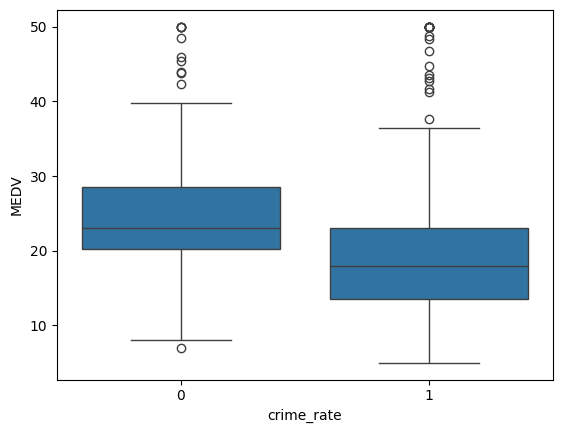

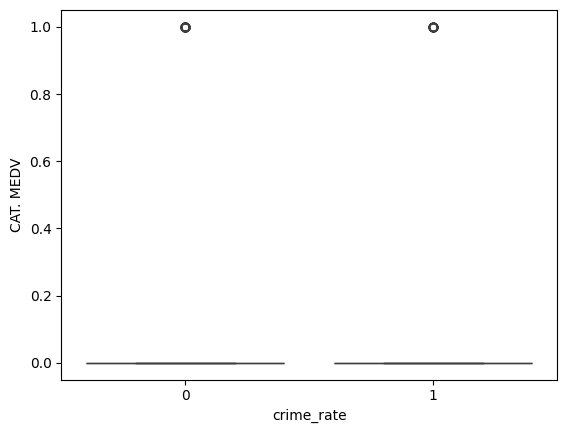

In [167]:
housing_df = df.drop(['CRIM', 'crime_rate'], axis=1)

for c in housing_df.columns:
    sns.boxplot(x=df['crime_rate'], y=housing_df[c])
    plt.show()

In [168]:
# INDUS, NOX, AGE, DIS, RAD

train, test = train_test_split(df, test_size=0.3)

X_train = train[['INDUS', 'NOX', 'AGE', 'DIS', 'RAD']]
y_train = train['crime_rate']

X_test = test[['INDUS', 'NOX', 'AGE', 'DIS', 'RAD']]
y_test = test['crime_rate']

In [169]:
# Explore logistic regression, LDA, naive Bayes, and KNN

# fit model
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)

# predict
y_pred_lda = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lda)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])

print(confusion_matrix_df)

print()

print_conf_matrix_stats(confusion_matrix)

           Predicted: 0  Predicted: 1
Actual: 0            73             9
Actual: 1            17            53

Accuracy : 0.8289
Precision: 0.8548
Recall   : 0.7571
F1 Score : 0.8030
